Referência:
https://colab.research.google.com/drive/1lTGZsfMaGUpBG4inDIQwIJVW476ibXk_


In [ ]:
# Instalação do OpenCV

# Install minimal prerequisites (Ubuntu 18.04 as reference)
!sudo apt update && sudo apt install -y cmake g++ wget unzip

!sudo apt install nano

!sudo ldconfig

# Download and unpack sources
!wget -O opencv.zip https://github.com/opencv/opencv/archive/4.x.zip
!unzip opencv.zip

# Create build directory
!mkdir -p build && cd build

!sudo apt install libopencv-dev

!pip install opencv-python

In [1]:
# Verificar se openCV4 está instalado

!pkg-config --cflags opencv4

-I/usr/include/opencv4 


In [ ]:
# Configure
#!cmake  opencv-4.x

# Build
#!cmake --build .

In [5]:
# This cell imports the drive library and mounts your Google Drive as a VM local drive. You can access to your Drive files
# using this path "/content/gdrive/My Drive/"

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
# List the content of your local computer folder
!ls -la "/content/gdrive/My Drive/darknet"

total 8
drwx------ 3 root root 4096 Feb 17 13:39 bin
drwx------ 2 root root 4096 Jan 27 11:58 cuDNN


In [7]:
!sudo apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (86.8 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 126896 files and directories currently instal

In [1]:
!tree /content/gdrive/My\ Drive/darknet/

/content/gdrive/My Drive/darknet/
├── bin
│   └── darknet
│       └── darknet
└── cuDNN
    └── cudnn-linux-x86_64-9.7.1.26_cuda12-archive.tar.xz

3 directories, 2 files


In [9]:
# This cell can be commented once you checked the current CUDA version
# CUDA: Let's check that Nvidia CUDA is already pre-installed and which version is it. In some time from now maybe you
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [10]:
# We're unzipping the cuDNN files from your Drive folder directly to the VM CUDA folders
!tar -xf gdrive/My\ Drive/darknet/cuDNN/cudnn-linux-x86_64-9.7.1.26_cuda12-archive.tar.xz -C /usr/local/

!chmod a+r /usr/local/cudnn-linux-x86_64-9.7.1.26_cuda12-archive/include/cudnn.h

In [11]:
# Now we check the version we already installed. Can comment this line on future runs
!cat /usr/local/cudnn-linux-x86_64-9.7.1.26_cuda12-archive/include/cudnn.h | grep CUDNN_MAJOR -A 2

In [ ]:
# Remover os fontes do repositório, caso seja necessário

%cd ..

%rm -rf darknet

/content


In [1]:
# Leave this code uncommented on the very first run of your notebook or if you ever need to recompile darknet again.
# Comment this code on the future runs.
#!git clone https://github.com/FelAnzolin/darknet/
%cd darknet

/content/darknet


In [4]:
# Check the folder
!ls

3rdparty	CMakeSettings.json	Dockerfile.cpu	       Makefile		vcpkg.json
appveyor.yml	darknet			Dockerfile.gpu	       net_cam_v3.sh	video_v2.sh
build		DarknetConfig.cmake.in	image_yolov2.sh        net_cam_v4.sh	video_yolov3.sh
build.ps1	darknet_images.py	image_yolov3.sh        package.xml	video_yolov4.sh
build.sh	darknet.py		image_yolov4.sh        predictions.jpg	yolov3.weights
cfg		darknet_video.py	include		       README.md
cmake		data			json_mjpeg_streams.sh  scripts
CMakeLists.txt	docker-compose.yml	LICENSE		       src


In [ ]:
#Compile Darknet
!make clean

!make

In [19]:
#Copies the Darknet compiled version to Google drive
!cp ./darknet /content/gdrive/My\ Drive/darknet/bin/darknet

In [20]:
# Uncomment after the first run, when you have a copy of compiled darknet in your Google Drive

# Makes a dir for darknet and move there
#!mkdir darknet

# Copy the Darknet compiled version to the VM local drive
!cp /content/gdrive/My\ Drive/darknet/bin/darknet/darknet ./darknet

# Set execution permissions to Darknet
!chmod +x ./darknet

In [3]:
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)

  # Check if image was loaded successfully
  if image is None:
    print(f"Error: Could not read image from {path}. Check if the file exists and is not corrupted.")
    return

  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
# Not necessary cell
# Get yolov3 weights
!wget https://pjreddie.com/media/files/yolov3.weights

In [ ]:
#Downgrade do cuda, se necessário

#!apt-get --purge remove cuda
#!apt-get install -y cuda-toolkit-12-4 # Replace with your desired version

In [ ]:
!apt update && sudo apt install nvidia-driver-550-open # Replace with the appropriate driver package for your CUDA toolkit version

In [12]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Mar_28_02:18:24_PDT_2024
Cuda compilation tools, release 12.4, V12.4.131
Build cuda_12.4.r12.4/compiler.34097967_0


In [5]:
!nvidia-smi

Tue Feb 18 12:55:43 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!dpkg -l | grep nvidia

modprobe: FATAL: Module nvidia not found in directory /lib/modules/6.1.85+


In [ ]:
#!sudo apt-get --purge remove libnvidia-compute-555:amd64
#!sudo apt-get --purge remove nvidia-compute-utils-555
#!sudo apt-get --purge remove nvidia-dkms-555-open
#!sudo apt-get --purge remove nvidia-firmware-555-555.42.06
#!sudo apt-get --purge remove nvidia-kernel-common-555

In [7]:
#Corrigir o PATH, se necessário

#import os
#os.environ['PATH'] = '/usr/local/cuda-12.4/bin:' + os.environ['PATH']

 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

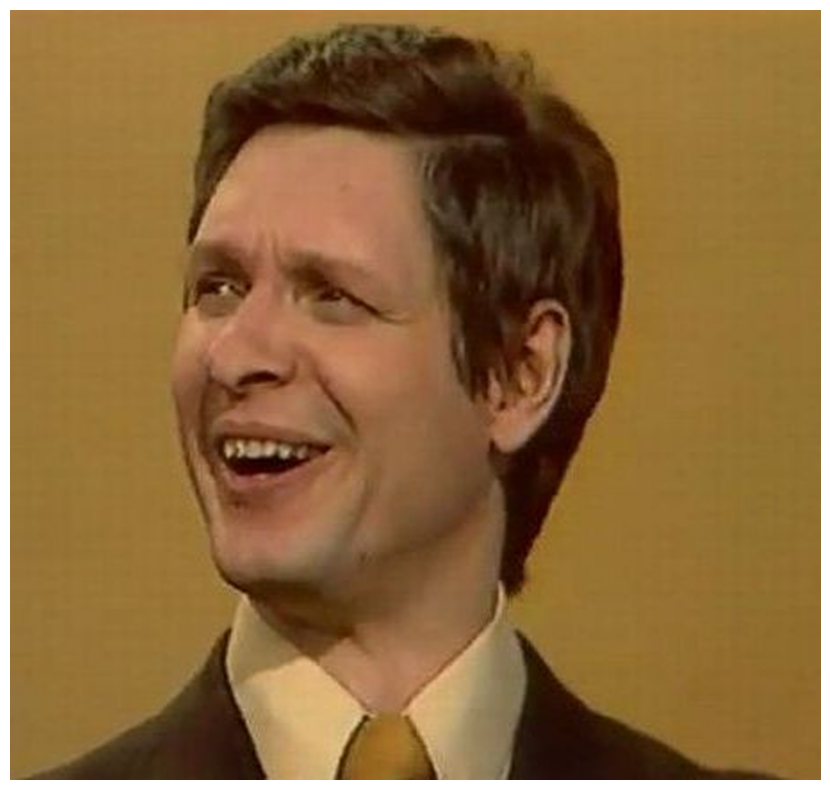

In [16]:
# Not necessary cell
# Execute darknet using YOLOv3 model with pre-trained weights to detect objects on 'person.jpg'
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg -dont-show

# Show the result using the helper imgShow()
imShow('predictions.jpg')